In [1]:
import sys
print(sys.executable)

e:\VS Code Projects\ML Notebooks\ML\venv\Scripts\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines

In [3]:
training_set = pd.read_csv('Student_performance.csv')
training_set["Extracurricular Activities"] = training_set["Extracurricular Activities"].map({"Yes": 1, "No": 0})


X = training_set.iloc[:, :-1].to_numpy().astype(float)
y = training_set.iloc[:, -1].to_numpy()
print(X)
print(y)

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 ...
 [ 6. 83.  1.  8.  5.]
 [ 9. 97.  1.  7.  0.]
 [ 7. 74.  0.  8.  1.]]
[91. 65. 45. ... 74. 95. 64.]


In [4]:
training_set.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [5]:
training_set.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [6]:
def min_max_scaling(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))
def standardise(X):
    print(np.mean(X), np.std(X))
    print((X - np.mean(X)) / np.std(X))
    return (X - np.mean(X)) / np.std(X)

In [ ]:
for i in range(X.shape[1]):
    print(X[:,i])
    if(i != 2):
        X[:,i] = standardise(X[:,i])   

[7. 4. 8. ... 6. 9. 7.]
4.9929 2.5891793275090085
[ 0.77518771 -0.38348058  1.16141048 ...  0.38896495  1.54763324
  0.77518771]
[99. 82. 51. ... 83. 97. 74.]
69.4457 17.34228507175453
[ 1.70417565  0.72391268 -1.06362569 ...  0.7815752   1.5888506
  0.26261245]
[1. 0. 1. ... 1. 1. 0.]
[9. 4. 7. ... 8. 7. 8.]
6.5306 1.6957781812489512
[ 1.45620461 -1.49229423  0.27680507 ...  0.86650484  0.27680507
  0.86650484]
[1. 2. 2. ... 5. 0. 1.]
4.5833 2.8672044067348947
[-1.24975394 -0.90098215 -0.90098215 ...  0.1453332  -1.59852572
 -1.24975394]


In [ ]:
print(X)

[[ 0.77518771  1.70417565  1.          1.45620461 -1.24975394]
 [-0.38348058  0.72391268  0.         -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.          0.27680507 -0.90098215]
 ...
 [ 0.38896495  0.7815752   1.          0.86650484  0.1453332 ]
 [ 1.54763324  1.5888506   1.          0.27680507 -1.59852572]
 [ 0.77518771  0.26261245  0.          0.86650484 -1.24975394]]


In [ ]:
class LinearRegression:
    def __init__(self, alpha = 0.1):
        self.alpha = alpha
        self.weights = None
        self.bias = 0
    
    def fit(self, x):
        n_features = x.shape[1]
        self.weights = np.ones(n_features)    
        
    def cost_function(self, x , y):
        return (np.sum((np.dot(x, self.weights) + self.bias - y) ** 2)) / (2 * x.shape[0])
    
    def compute_gradient(self, x, y):
        m,n = x.shape
        error = np.dot(x,self.weights) + self.bias - y
        dc_dw = np.array([np.dot(error ,x[:,j]) / m for j in range(n)])
        dc_db = np.sum(error) / m
        return dc_dw,dc_db
    
    def gradient_descent(self, x, y, n_iterations = 1000):
        cost_iterations = []
        for i in range(n_iterations):
            dc_dw,dc_db = self.compute_gradient(x,y)
            self.weights -= self.alpha * dc_dw
            self.bias -= self.alpha * dc_db
            print(f"Iteration {i}: cost = {self.cost_function(x,y)}")
            cost_iterations.append(self.cost_function(x,y))
        return cost_iterations  
    
    def predict(self, x):
        return np.dot(x, self.weights) + self.bias 
        

In [ ]:

alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1]
cost_history = {}
for alpha in alpha_values:
    model = LinearRegression(alpha)
    model.fit(X)
    cost_history[alpha] = model.gradient_descent(X,y, 100)

Iteration 0: cost = 1657.5857179170682
Iteration 1: cost = 1657.5453111294732
Iteration 2: cost = 1657.5049053695045
Iteration 3: cost = 1657.464500637136
Iteration 4: cost = 1657.4240969323412
Iteration 5: cost = 1657.3836942550936
Iteration 6: cost = 1657.343292605367
Iteration 7: cost = 1657.3028919831347
Iteration 8: cost = 1657.2624923883707
Iteration 9: cost = 1657.2220938210485
Iteration 10: cost = 1657.1816962811415
Iteration 11: cost = 1657.1412997686236
Iteration 12: cost = 1657.1009042834685
Iteration 13: cost = 1657.0605098256492
Iteration 14: cost = 1657.0201163951403
Iteration 15: cost = 1656.9797239919144
Iteration 16: cost = 1656.939332615946
Iteration 17: cost = 1656.8989422672078
Iteration 18: cost = 1656.8585529456743
Iteration 19: cost = 1656.8181646513187
Iteration 20: cost = 1656.7777773841146
Iteration 21: cost = 1656.7373911440357
Iteration 22: cost = 1656.6970059310559
Iteration 23: cost = 1656.6566217451484
Iteration 24: cost = 1656.6162385862867
Iteration 25:

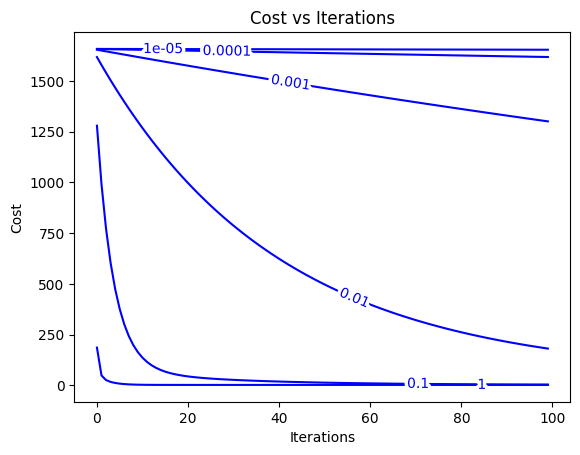

In [ ]:
for alpha in alpha_values:
    x_axis,y_axis = [i for i in range(len(cost_history[alpha]))], cost_history[alpha] 
    plt.plot(x_axis, y_axis , color='blue' , label = alpha)
    # plt.text(x_axis[-1], y_axis[-1], alpha, va = 'center')
    
labelLines(plt.gca().get_lines())    
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
table = np.array([model.predict(X),y])
print(table)

[[93.3131854  60.90344496 46.49270152 ... 74.4101729  95.77183676
  63.17470821]
 [91.         65.         45.         ... 74.         95.
  64.        ]]
